### Importing Libraries:

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

### Import and load dataset:

In [10]:
# load the Dataset:
df = pd.read_csv("cars.csv")
df.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0


### EDA:
- **Univariate Analysis** : To understand the distribution of features
- **Multivariate Analysis** : To find patterns and correlation between variables

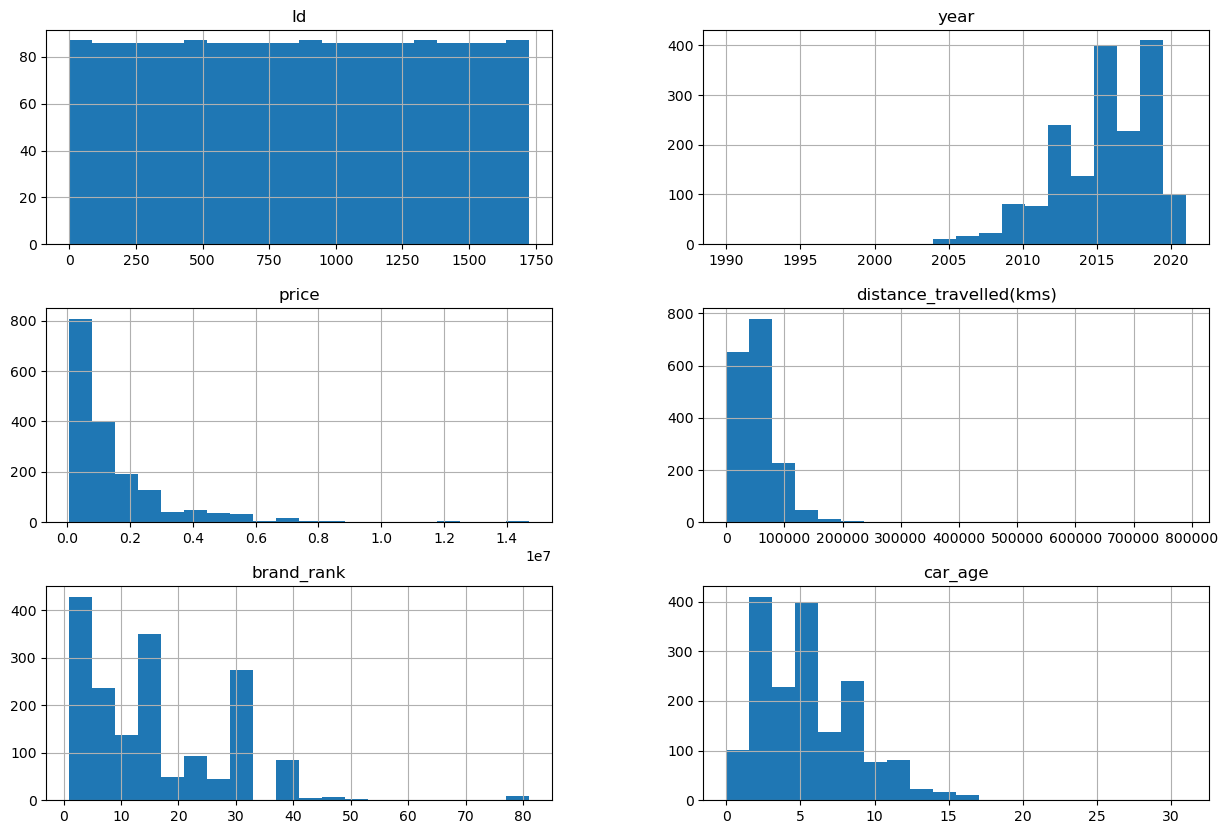

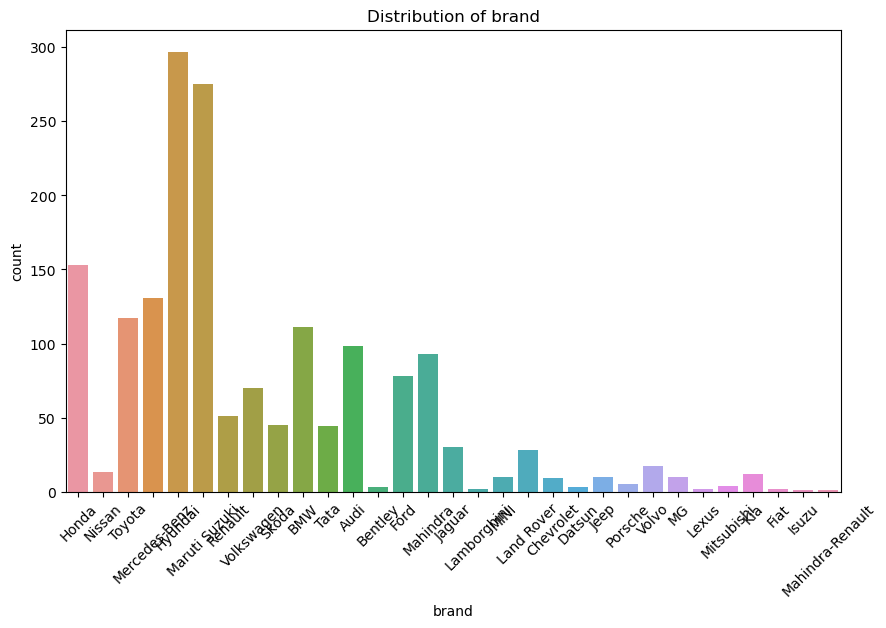

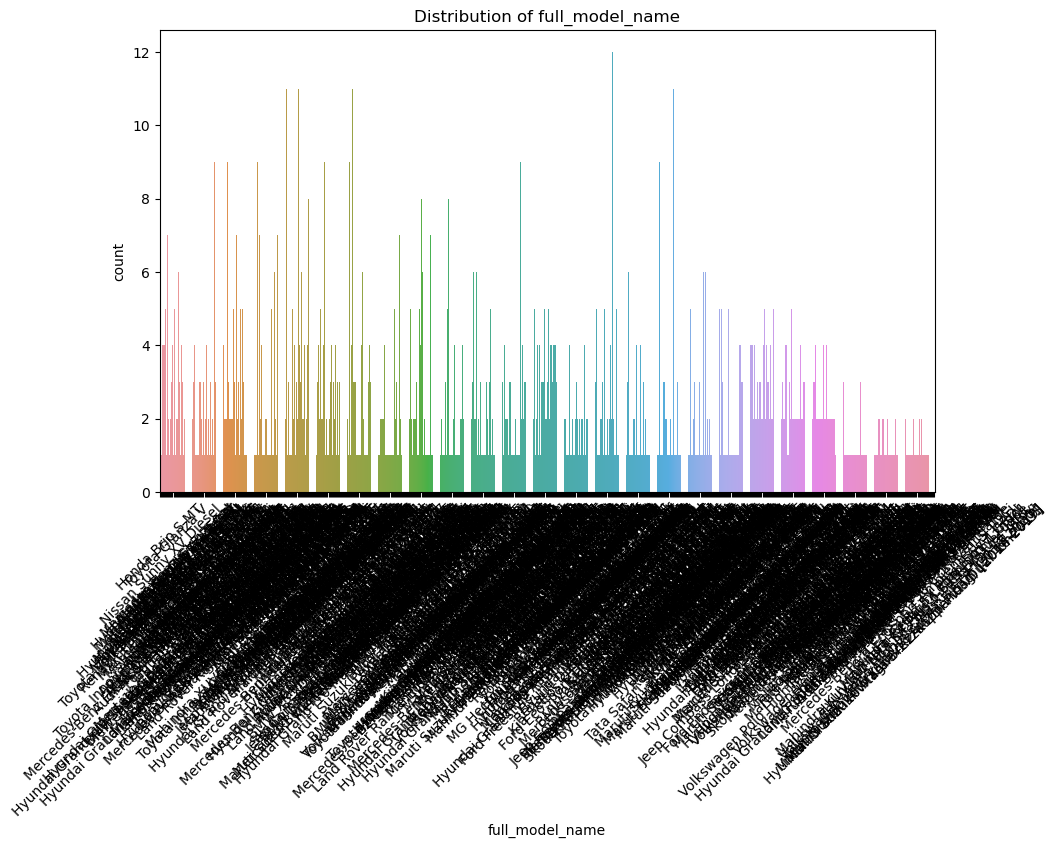

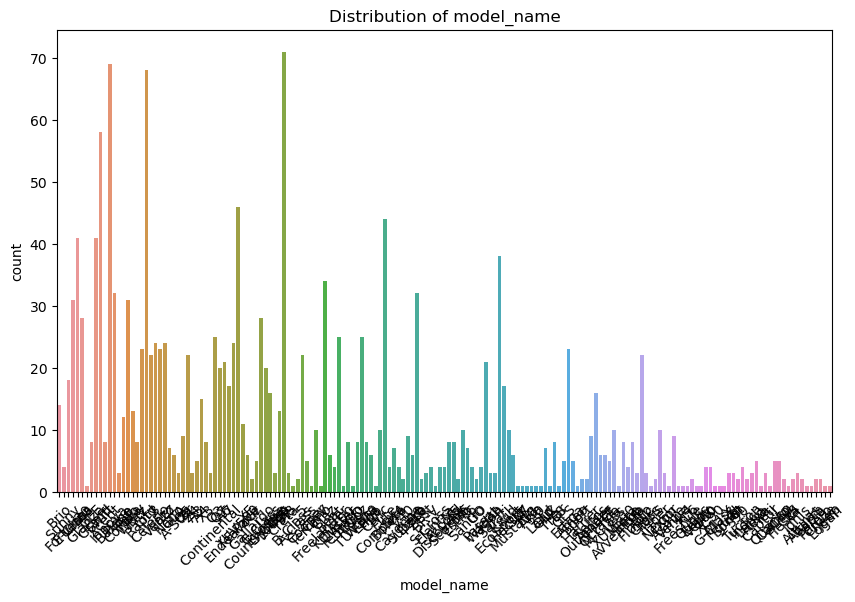

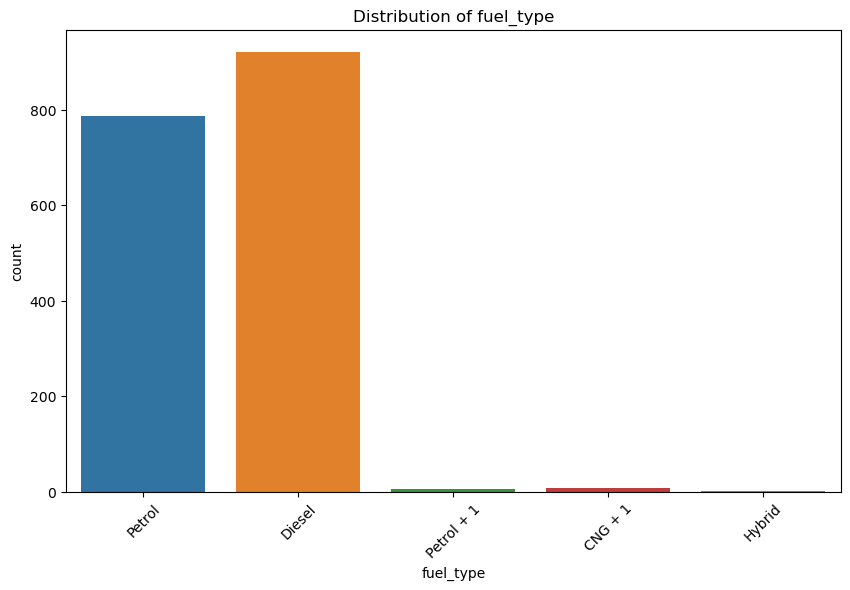

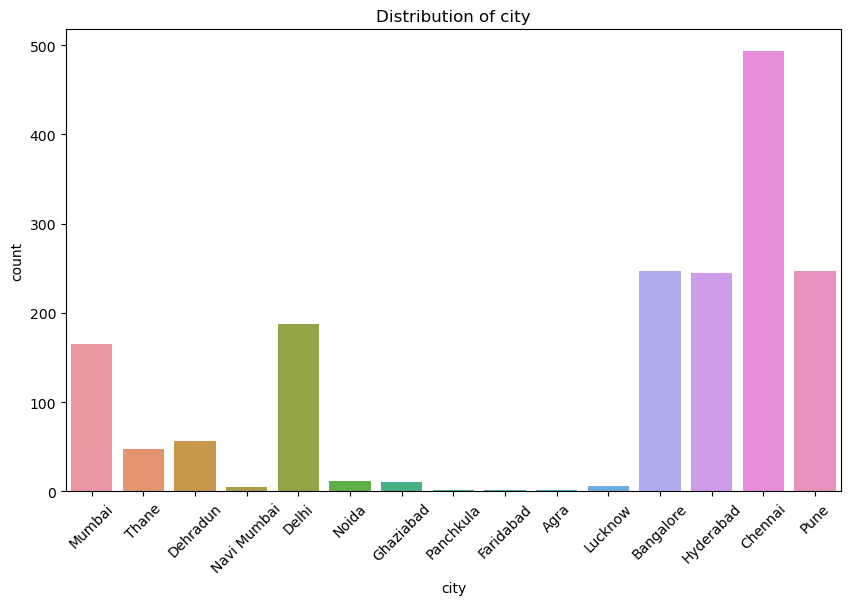

In [11]:
# Plot histograms for numerical features
df.hist(bins=20, figsize=(15,10))
plt.show()

# Check for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


#### Perform Univariate Analysis on <u>**Numerical Variables**</u> using histogram <u>**histplot**</u> function from Seaborn.

<Axes: xlabel='car_age', ylabel='Count'>

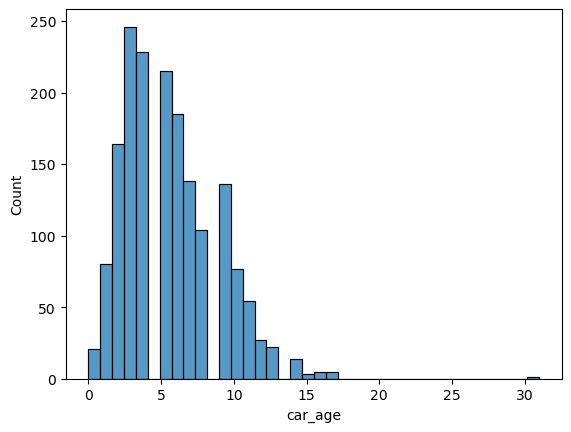

In [12]:
sns.histplot(df['car_age'])

#### Perform Univariate Analysis on <u>**Categorical Variables**</u> using <u>**Countplot**</u> function from Seaborn.

<Axes: xlabel='model_name', ylabel='count'>

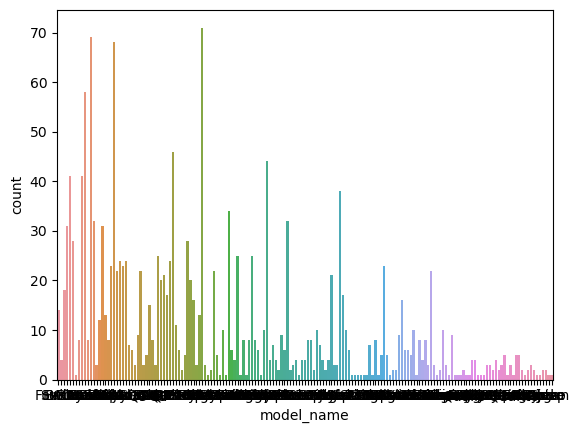

In [13]:
sns.countplot(x=df["model_name"])

<Axes: xlabel='full_model_name', ylabel='count'>

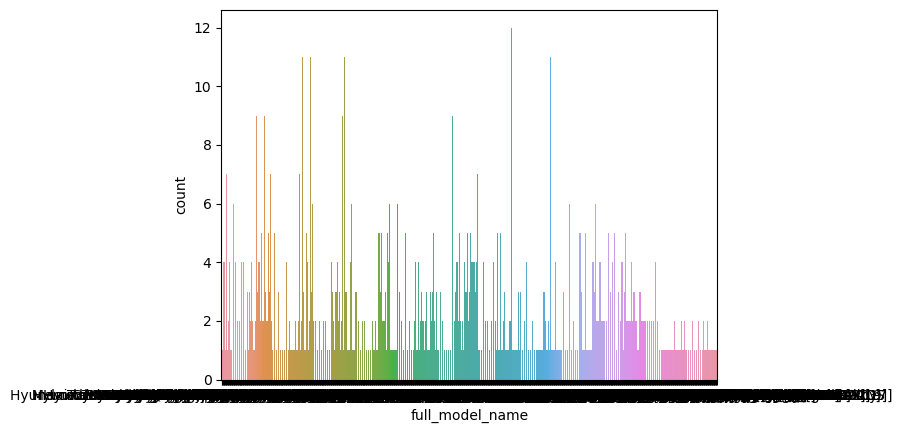

In [14]:
sns.countplot(x=df['full_model_name'])

In [15]:
# Define features (X) and target variable (y)
y = df['price']
X = pd.get_dummies(df.drop(columns=['price']), drop_first=True)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional depending on model)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Performance Metrics
print("Linear Regression Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_linear)}")
print(f"R-squared: {r2_score(y_test, y_pred_linear)}")

print("\nRandom Forest Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R-squared: {r2_score(y_test, y_pred_rf)}")


Linear Regression Performance:
Mean Squared Error: 1.5618038114878704e+39
R-squared: -4.652360279577874e+26

Random Forest Performance:
Mean Squared Error: 998583212592.1014
R-squared: 0.7025382548086552


In [16]:
# Feature importance from Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to visualize the feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 important features
print(importance_df.head(10))


                    Feature  Importance
3                brand_rank    0.129449
4                   car_age    0.084772
1                      year    0.066997
18         brand_Land Rover    0.042975
25      brand_Mercedes-Benz    0.042545
14             brand_Jaguar    0.037932
2   distance_travelled(kms)    0.033502
17        brand_Lamborghini    0.031165
33         brand_Volkswagen    0.029197
34              brand_Volvo    0.027786
